Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '/home/jaehyuk/data/kaggle/competitions/competitive-data-science-final-project'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
transactions.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
# 시간데이터로 접근 가능하게 만듬 .dt.year or .dt.month etc.
transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')

In [6]:
transactions.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [7]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
# 2014년 9월로 filtering
tr_2014 = transactions[transactions['date'].dt.year==2014]
tr_9_2014 = tr_2014[tr_2014['date'].dt.month==9]

In [11]:
tr_9_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.0,1.0
1953692,2014-09-27,20,5,1015,449.0,1.0
1953693,2014-09-07,20,5,1329,399.0,1.0
1953694,2014-09-27,20,5,984,399.0,1.0
1953695,2014-09-08,20,5,984,399.0,1.0


In [12]:
# revenue
tr_9_2014.loc[:, 'revenue'] = tr_9_2014.item_price * tr_9_2014.item_cnt_day
# tr_9_2014['revenum'] = tr_9_2014.item_price * tr_9_2014.item_cnt_day

/mnt/c/data/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/mnt/c/data/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
tr_9_2014.groupby('shop_id').revenue.sum().max()

7982852.199999956

In [14]:
max_revenue = 7982852.20
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [15]:
# 2014년 6,7,8월 filtering
tr_sum_2014 = tr_2014.query('20140601<date<20140831')
# tr_sum_2014 = tr_2014[(tr_2014['date'].dt.month==6) | (tr_2014['date'].dt.month==7) | (tr_2014['date'].dt.month==8)]
# tr_2014.set_index('date')['20140601':'20140831']

In [16]:
tr_sum_2014.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1705909,2014-06-15,17,26,9532,399.00,1.0
1705910,2014-06-10,17,26,9507,149.00,1.0
1705911,2014-06-13,17,26,9509,246.32,1.0
1705912,2014-06-03,17,26,9532,399.00,1.0
1705913,2014-06-08,17,26,9532,399.00,1.0


In [17]:
# item_id에 대응하는 item_categroy를 삽입
tr_sum_2014 = pd.merge(tr_sum_2014, items)

In [18]:
# revenue
tr_sum_2014['revenue'] = tr_sum_2014['item_price'] * tr_sum_2014['item_cnt_day']

In [20]:
tr_sum_2014.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,revenue
0,2014-06-15,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
1,2014-06-03,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
2,2014-06-08,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
3,2014-06-11,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
4,2014-06-19,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0


In [21]:
tr_sum_2014.groupby('item_category_id').revenue.sum().idxmax()

20

In [22]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [23]:
# item_id를 index화 후, 변동(std)를 계산. 0이면 변동 X, Nan은 1개의 상품이기 때문에 변동 X에 포함
transactions.groupby('item_id').std()[(transactions.groupby('item_id').std().item_price == 0) | (transactions.groupby('item_id').std().item_price.isnull())]

,date_block_num,shop_id,item_price,item_cnt_day
item_id,,,,
0,NaN,NaN,NaN,NaN
1,2.529822,0.000000,0.0,0.000000
2,2.121320,0.000000,0.0,0.000000
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,0.707107,0.000000,0.0,0.000000
9,NaN,NaN,NaN,NaN


In [24]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [25]:
# 2014년 shop_id=25와 12월로 filtering
shop25 = tr_2014.shop_id == 25
december = tr_2014.date.dt.month == 12
df4 = tr_2014[shop25 & december]
df4.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0


In [26]:
# sorting by date
df4.sort_values(by='date', inplace=True)
df4.head(5)

/mnt/c/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2318118,2014-12-01,23,25,18163,349.0,2.0
2317703,2014-12-01,23,25,12448,149.0,1.0
2320340,2014-12-01,23,25,4336,2699.0,1.0
2321803,2014-12-01,23,25,3158,1290.0,1.0
2319880,2014-12-01,23,25,17096,149.0,1.0


In [27]:
df4 = df4.groupby('date').sum()

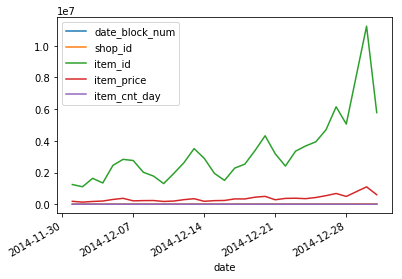

In [30]:
%matplotlib inline
df4.plot()

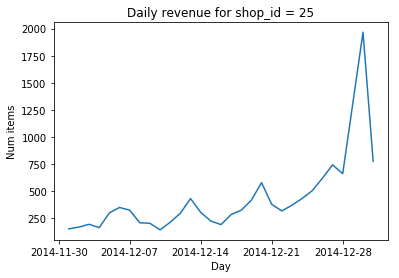

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [29]:
shop_id = 25

total_num_items_sold = df4.item_cnt_day
days = df4.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

# ddof -> 1 / N-ddof, unbiased를 위해 1로 설정
total_num_items_sold_var = np.var(df4.item_cnt_day, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [41]:
STUDENT_EMAIL = 'leejh920917@gmail.com'
STUDENT_TOKEN = 'QOGyuHm90tbIOGII'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [42]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)